# Credit Card Fraud Detection Competition

IEEE-CIS works across a variety of AI and machine learning areas, including deep neural networks, fuzzy systems, evolutionary computation, and swarm intelligence. Today they’re partnering with the world’s leading payment service company, Vesta Corporation, seeking the best solutions for fraud prevention industry.

This notebook contains preprocessing and visualization of data given in this kaggle competition along with creating a Logistic Regression model in the end.

For more information, go to: https://www.kaggle.com/c/ieee-fraud-detection/overview

## Data Import and Merge

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# identity and transaction are given in 2 different csv files. 
# Read the data using pandas and merge the csv's with common column TransactionID
id_raw_df   =pd.read_csv("train_identity.csv")
id_trans_df =pd.read_csv("train_transaction.csv")
train_full_df = pd.merge(id_trans_df, id_raw_df, on='TransactionID', how='left')
train_full_df.shape

(590540, 434)

## Data visualization

In [108]:
train_full_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


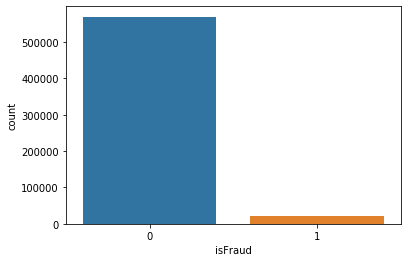

In [109]:
sns.countplot(train_full_df["isFraud"])

Text(0, 0.5, 'Missing rate')

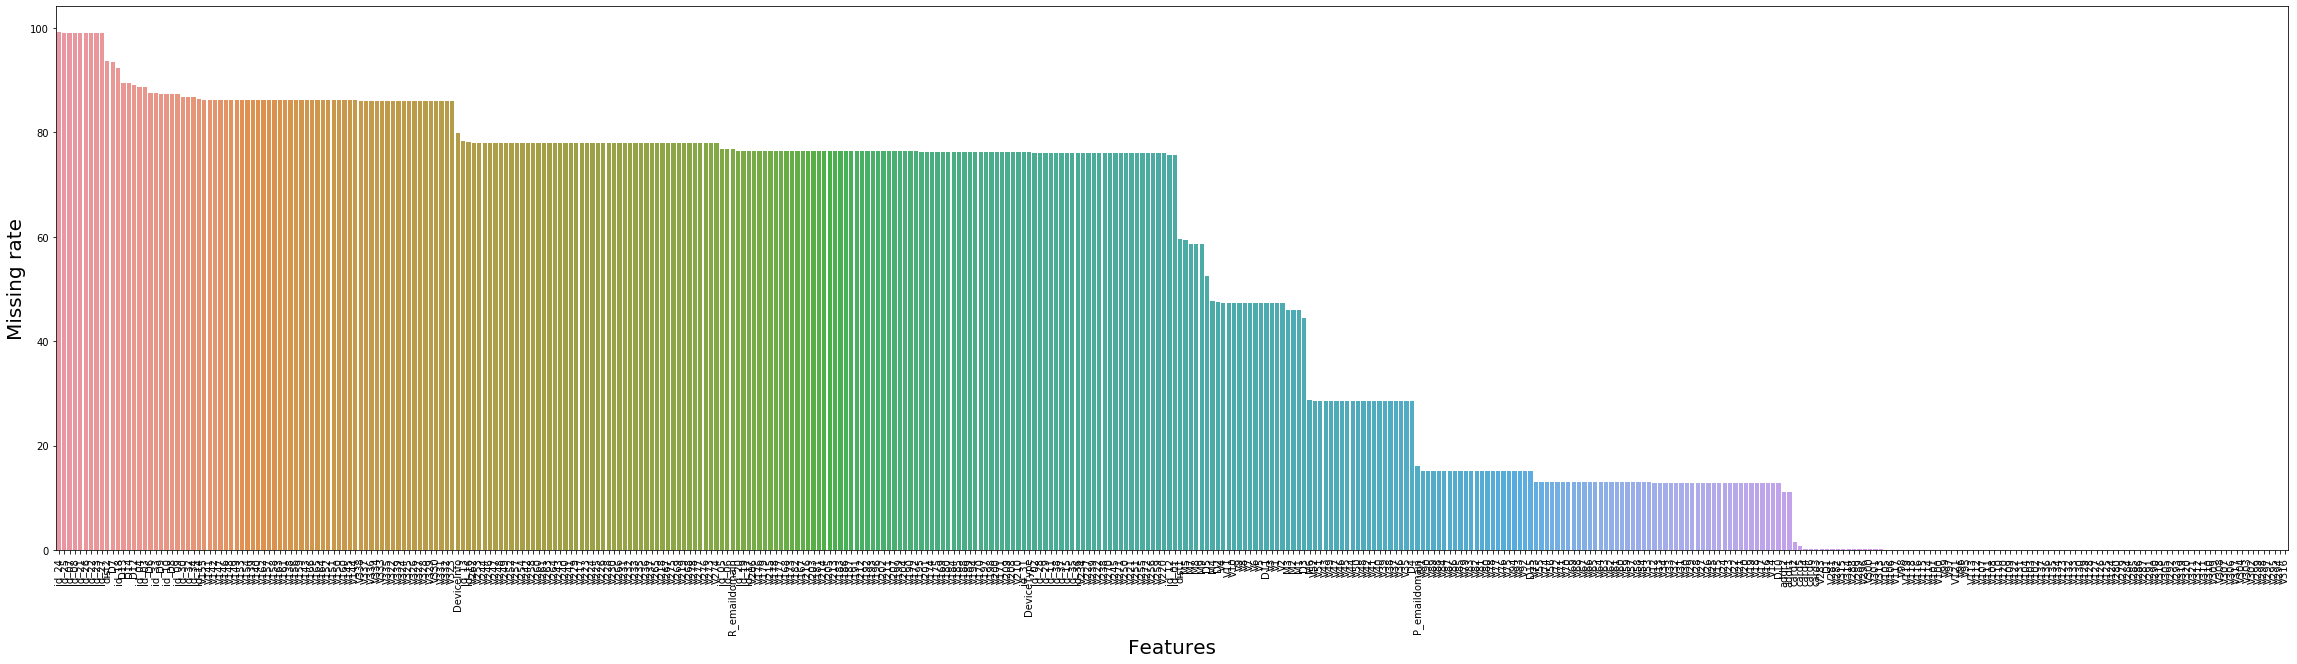

In [110]:
data_null = train_full_df.isnull().sum()/len(train_full_df) * 100
data_null = data_null.drop(data_null[data_null == 0].index).sort_values(ascending=False)[:500]
missing_data = pd.DataFrame({'Missing Ratio': data_null})
missing_data.head()

plt.subplots(figsize=(40,10))
plt.xticks(rotation='90')
sns.barplot(data_null.index, data_null)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Missing rate', fontsize=20)

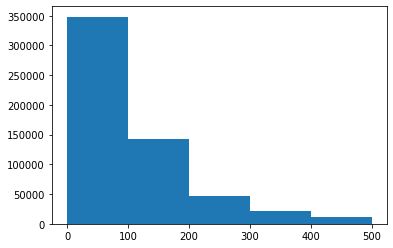

In [111]:
plt.hist(train_full_df['TransactionAmt'],bins=5, range=(0, 500));

## Data Preprocessing

In [112]:
def get_too_many_null_attr(data):
    many_null_cols = [col for col in data.columns if data[col].isnull().sum() / data.shape[0] > 0.15]
    return many_null_cols

def get_too_many_repeated_val(data):
    big_top_value_cols = [col for col in data.columns if data[col].value_counts(dropna=False, normalize=True).values[0] > 0.95]
    return big_top_value_cols

def get_useless_columns(data):
    too_many_null = get_too_many_null_attr(data)
    print("More than 15% null: " + str(len(too_many_null)))
    too_many_repeated = get_too_many_repeated_val(data)
    print("More than 95% repeated value: " + str(len(too_many_repeated)))
    cols_to_drop = list(set(too_many_null + too_many_repeated))
    cols_to_drop.remove('isFraud')
    return cols_to_drop

cols_to_drop = get_useless_columns(train_full_df)
train_full_df = train_full_df.drop(cols_to_drop, axis=1)
cols_to_drop

More than 15% null: 274
More than 95% repeated value: 39


['id_12',
 'V140',
 'V168',
 'V281',
 'V152',
 'V170',
 'V217',
 'V268',
 'V276',
 'V329',
 'id_27',
 'V241',
 'id_07',
 'V177',
 'V111',
 'V135',
 'V214',
 'id_10',
 'D3',
 'V250',
 'V39',
 'V222',
 'id_03',
 'V277',
 'V108',
 'V92',
 'V83',
 'M7',
 'V10',
 'V175',
 'V212',
 'V75',
 'V231',
 'V218',
 'V174',
 'V109',
 'V236',
 'V227',
 'V243',
 'V164',
 'D2',
 'V235',
 'V247',
 'V270',
 'id_37',
 'V266',
 'id_02',
 'V197',
 'id_26',
 'V224',
 'V185',
 'V255',
 'V190',
 'V195',
 'V213',
 'V323',
 'V336',
 'id_09',
 'D6',
 'V4',
 'V182',
 'V188',
 'V1',
 'V211',
 'V267',
 'V334',
 'V160',
 'V251',
 'id_13',
 'V216',
 'V50',
 'V246',
 'id_04',
 'id_29',
 'V110',
 'id_23',
 'id_01',
 'V90',
 'M1',
 'V220',
 'id_14',
 'V6',
 'V166',
 'dist1',
 'M5',
 'V37',
 'V187',
 'id_30',
 'V219',
 'V84',
 'V325',
 'id_28',
 'id_34',
 'V113',
 'V297',
 'id_22',
 'V180',
 'R_emaildomain',
 'V81',
 'V183',
 'V275',
 'V147',
 'V264',
 'id_06',
 'V198',
 'V118',
 'V330',
 'V278',
 'id_17',
 'V143',
 'V209'

## Convert columns to numeric

In [113]:
card6_dummy_df=pd.get_dummies(train_full_df["card6"])
train_full_df=pd.concat([train_full_df,card6_dummy_df],axis=1)
train_full_df=train_full_df._get_numeric_data()
train_full_df=train_full_df.dropna()
x_full_df=train_full_df.drop(["isFraud"],axis=1)
y_full_df=train_full_df["isFraud"]


X_train,X_test,y_train,y_test=train_test_split(x_full_df,y_full_df,test_size=0.50)

## LogisticRegression

In [114]:
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler  

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [115]:
lr = LogisticRegression(solver='lbfgs')  
lr.fit(X_train, y_train)  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
y_pred=lr.predict(X_test)

In [117]:
accuracy_score(y_test, y_pred)

0.9797364967142119